In [2]:
import pandas as pd
import statistics
# If you want to do the statistics with your own run of the benchmarks
df = pd.read_csv('../results_vmcai/stats.csv')
# otherwise do this 
# df = pd.read_csv('../computed/stats.csv')
df = df.fillna(0)
nv = df.groupby('filename').max('nb_vulns')
# Here we compute we group by options and nb of vulsn and we print the mean times taken by the analysis
df.groupby(['options']).mean('time')['time']
tmpu = df
tmp=df
tmpu['result']= df['result'].map(lambda x: 1 if (x  == "TRUE") else (0 if x == "UNKNOWN" else (0 if x == "FALSE" else -1)))
df=df.query("property != 'UAutomizer'")
dfg = df.groupby(['group','options']).sum('result')
dfg

result     loc  \
group      options                                                              
EndWatch   -domain boxes -ordinals 3  -refine -resilience          59  2176.0   
           -domain boxes -ordinals 3 -refine                        0  2176.0   
           -domain boxes -refine                                    0  2176.0   
           -domain boxes -refine -resilience                       58  2176.0   
           -domain polyhedra -joinbwd 5 -ordinals 3  -refi...      45  2176.0   
           -domain polyhedra -joinbwd 5 -ordinals 3 -refine        -6  2176.0   
           -domain polyhedra -joinbwd 8 -ordinals 3  -refi...      45  2176.0   
           -domain polyhedra -joinbwd 8 -ordinals 3 -refine        -6  2176.0   
           -domain polyhedra -ordinals 3  -refine -resilience      54  2176.0   
           -domain polyhedra -ordinals 3 -refine                    2  2176.0   
           -domain polyhedra -refine                                0  2176.0   
           -domain polyhedra -refine -resilience                   50  2176.0   
Pulse      -domain boxes -ordinals 3  -refine -resilience          23   864.0   
           -domain boxes -ordinals 3 -refine                        0   864.0   
           -domain boxes -refine                                    0   864.0   
           -domain boxes -refine -resilience                       23   864.0   
           -domain polyhedra -joinbwd 5 -ordinals 3  -refi...      23   864.0   
           -domain polyhedra -joinbwd 5 -ordinals 3 -refine         0   864.0   
           -domain polyhedra -joinbwd 8 -ordinals 3  -refi...      23   864.0   
           -domain polyhedra -joinbwd 8 -ordinals 3 -refine         0   864.0   
           -domain polyhedra -ordinals 3  -refine -resilience      23   864.0   
           -domain polyhedra -ordinals 3 -refine                    0   864.0   
           -domain polyhedra -refine                                0   864.0   
           -domain polyhedra -refine -resilience                   23   864.0   
SvComp     -domain boxes -ordinals 3  -refine -resilience          58  3446.0   
           -domain boxes -ordinals 3 -refine                        0  3446.0   
           -domain boxes -refine                                    0  3446.0   
           -domain boxes -refine -resilience                       58  3446.0   
           -domain polyhedra -joinbwd 5 -ordinals 3  -refi...      97  3446.0   
           -domain polyhedra -joinbwd 5 -ordinals 3 -refine        -2  3446.0   
           -domain polyhedra -joinbwd 8 -ordinals 3  -refi...      97  3446.0   
           -domain polyhedra -joinbwd 8 -ordinals 3 -refine        -2  3446.0   
           -domain polyhedra -ordinals 3  -refine -resilience     101  3446.0   
           -domain polyhedra -ordinals 3 -refine                    0  3446.0   
           -domain polyhedra -refine                                0  3446.0   
           -domain polyhedra -refine -resilience                   99  3446.0   
SvComp-nla -domain boxes -ordinals 3  -refine -resilience          20  4651.0   
           -domain boxes -ordinals 3 -refine                        0  4651.0   
           -domain boxes -refine                                    0  4651.0   
           -domain boxes -refine -resilience                       20  4651.0   
           -domain polyhedra -joinbwd 5 -ordinals 3  -refi...      20  4651.0   
           -domain polyhedra -joinbwd 5 -ordinals 3 -refine         0  4651.0   
           -domain polyhedra -joinbwd 8 -ordinals 3  -refi...      20  4651.0   
           -domain polyhedra -joinbwd 8 -ordinals 3 -refine         0  4651.0   
           -domain polyhedra -ordinals 3  -refine -resilience      20  4651.0   
           -domain polyhedra -ordinals 3 -refine                    0  4651.0   
           -domain polyhedra -refine                                0  4651.0   
           -domain polyhedra -refine -resilience                   20  4651.0   

            

In [8]:
# Mean time by options
df.groupby(['options']).mean('time')['time']


options
-domain boxes -ordinals 3  -refine -resilience                   0.019431
-domain boxes -ordinals 3 -refine                                0.019066
-domain boxes -refine                                            0.018409
-domain boxes -refine -resilience                                0.019206
-domain polyhedra -joinbwd 5 -ordinals 3  -refine -resilience    1.294462
-domain polyhedra -joinbwd 5 -ordinals 3 -refine                 0.907937
-domain polyhedra -joinbwd 8 -ordinals 3  -refine -resilience    1.484431
-domain polyhedra -joinbwd 8 -ordinals 3 -refine                 1.029951
-domain polyhedra -ordinals 3  -refine -resilience               0.765723
-domain polyhedra -ordinals 3 -refine                            0.220934
-domain polyhedra -refine                                        0.177082
-domain polyhedra -refine -resilience                            0.760890
Name: time, dtype: float64

In [10]:
# Average number of line of code
df.groupby(['group']).mean('loc')


,result,loc,time,alarms
group,,,,
EndWatch,0.291667,25.302326,1.913628,0.599806
Pulse,0.273810,20.571429,0.045107,0.726190
SvComp,0.281111,22.973333,0.232563,0.710000
SvComp-nla,0.116279,54.081395,0.028069,0.883721


In [6]:
# Total time by options
df.groupby(['options']).sum('time')['time']


options
-domain boxes -ordinals 3  -refine -resilience                     7.073
-domain boxes -ordinals 3 -refine                                  6.940
-domain boxes -refine                                              6.701
-domain boxes -refine -resilience                                  6.991
-domain polyhedra -joinbwd 5 -ordinals 3  -refine -resilience    471.184
-domain polyhedra -joinbwd 5 -ordinals 3 -refine                 330.489
-domain polyhedra -joinbwd 8 -ordinals 3  -refine -resilience    540.333
-domain polyhedra -joinbwd 8 -ordinals 3 -refine                 374.902
-domain polyhedra -ordinals 3  -refine -resilience               278.723
-domain polyhedra -ordinals 3 -refine                             80.420
-domain polyhedra -refine                                         64.458
-domain polyhedra -refine -resilience                            276.964
Name: time, dtype: float64

In [11]:
# Percentage of alarms reduced for the first part of the experimental evaluation
tmpu = tmpu[tmpu['group'] != 'SvComp-nla']
tmpu[tmpu['property'] != 'UAutomizer' ]
s = sum(tmpu.groupby(['filename']).max('result')['result'])
l = len(tmpu.groupby(['filename']).max('result')['result'])
t =tmpu.groupby(['filename']).max('result')
s/l





0.7025089605734767

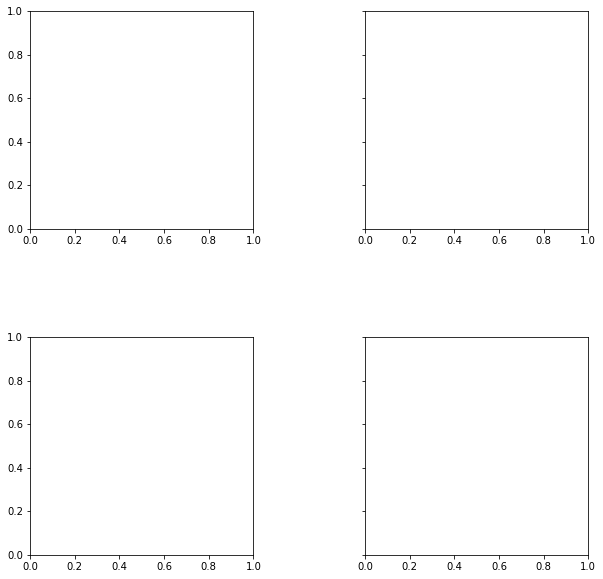

In [15]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
# Get all combinations of length 2 (or any length you want)
def cmp_dataframe(opt1,opt2):
    files = list(dict.fromkeys(df['filename']))
    # je veux comparer les options: j'ai chaque pair d'options, je réccup la valeur pour l'une et pour l'autre et je compare.
    # 
    cmp=pd.DataFrame(columns=['filename','option1','option2','precision','time1','time2'])
    grp=df.groupby(['options','filename']).max("time")
    for fname in files:
        q=f"filename=='{fname}'"
        grpquery= grp.query(q)
        q1 = f"options=='{opt1}'"
        q2 = f"options=='{opt2}'"
        time1 = grpquery.query(q1)["time"].values
        time2 = grpquery.query(q2)["time"].values
        if (grpquery.query(q1)["result"].values[0] > grpquery.query(q2)["result"].values[0]):    
            tmp=pd.DataFrame([[fname,opt1,opt2,0,time1,time2]], columns=['filename','option1','option2','precision','time1','time2'])
            cmp = pd.concat([cmp,tmp])
        elif (grpquery.query(q1)["result"].values[0] == grpquery.query(q2)["result"].values[0]):    
            tmp =pd.DataFrame([[fname,opt1,opt2,1,time1,time2]], columns=['filename','option1','option2','precision','time1','time2'])
            cmp = pd.concat([cmp,tmp])
        else:
            tmp =pd.DataFrame([[fname,opt1,opt2,2,time2,time2]], columns=['filename','option1','option2','precision','time1','time2'])
            cmp = pd.concat([cmp,tmp])

    return cmp
fig,axs = plt.subplots(2,2,sharey=True,figsize=(10,10))
fig.subplots_adjust(wspace=0.5,hspace=0.5)
def print_plot(plt,cmp):
    # Plot
    L=len(cmp["filename"])
    #plt.fig(figsize=(10,10))
    # Plot points for category A
    x_min = 0.005
    x_max = 4
    y_min = 0.005
    y_max = 4
    
    epsilon = 0.0001
    
    s = 100
    category_a =  cmp.query("precision == 2")    
    x=category_a['time1'].apply(lambda x: x if x < x_max else x_max-epsilon)
    y=category_a['time2'].apply(lambda x: x if x < y_max else y_max-epsilon)
    plt.scatter(x, y,color='blue', label='opt2 more precise than opt1', marker='o',zorder=10,s=s)

    
    category_c =  cmp.query("precision == 1")
    x=category_c['time1'].apply(lambda x: x if x < x_max else x_max-epsilon)
    y=category_c['time2'].apply(lambda x: x if x < y_max else y_max-epsilon)
    plt.scatter(x, y,color='green', label='opt1=opt2', marker='*',zorder=10,s=s)

    # Plot points for category B
    
    
    category_b =  cmp.query("precision == 0")
    x=category_b['time1'].apply(lambda x: x if x < x_max else x_max-epsilon)
    y=category_b['time2'].apply(lambda x: x if x < y_max else y_max-epsilon)
    plt.scatter(x, y, color='red', label='opt1 more precise than opt2 ', marker='x',zorder=10,s=s)
    
    
    plt.set_yscale('log')
    plt.set_xscale('log')
    
    plt.set_xlim(x_min, x_max)
    plt.set_ylim(y_min, y_max)
    # Labels and legend
    
    
    #plt.legend()
    plt.grid(True)
    yx = np.linspace(0,5,100)  # Generates 100 points between 0 and 10
    # Show the plot
    
    l = plt.plot(yx,yx,color='gray')
    
    



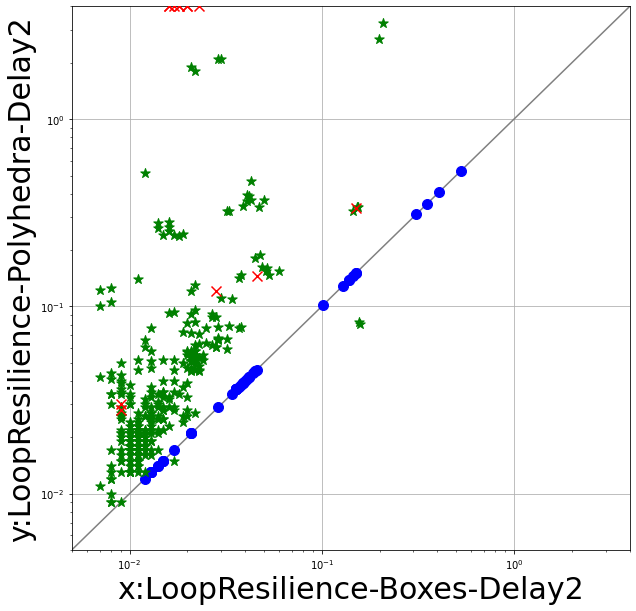

In [16]:
fig,axs = plt.subplots(1,1,sharey=True,figsize=(10,10))
fig.subplots_adjust(wspace=0.5,hspace=0.5)
axs.set_xlabel("x:LoopResilience-Boxes-Delay2",fontsize=30)
axs.set_ylabel("y:LoopResilience-Polyhedra-Delay2",fontsize=30)
print_plot(axs,cmp_dataframe("-domain boxes -refine -resilience","-domain polyhedra -refine -resilience"))
fig.savefig('cmppolyhedraboxesmultiA.svg')